# K-Means Clustering

In [31]:
%matplotlib inline
from glob import glob
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [32]:
meta_data = glob(r'D:\meta_data\*.json')
len(meta_data)  # 43861
track_df = pd.DataFrame(columns=["tempo", "tempo_confidence"])

In [34]:
# <json files into pandas DataFrame>
for i in range(1001):
    # <load json file>
    with open(meta_data[i]) as f:
        meta_json = json.load(f)

    # <seperate song information>
    data_info = pd.DataFrame({
        "tempo": meta_json['track']['tempo'],
        "tempo_confidence": meta_json['track']['tempo_confidence']
    }, index=[i])

    track_df = track_df.append(data_info, sort=True)

In [15]:
track_df.head(5)

,tempo,tempo_confidence
0,77.013,0.029
1,77.008,0.229
2,126.837,0.948
3,112.000,0.867
4,81.908,0.067
5,90.025,0.134
6,95.854,0.179
7,81.258,0.322
8,99.866,0.384
9,132.995,1.000


In [16]:
# <K-means Clustering>
tempo_KC = KMeans(n_clusters=5, random_state=0, algorithm='auto', n_init=1, max_iter=20)
tempo_KC.fit(track_df)
pred = tempo_KC.predict(track_df)
track_df['cluster'] = pred
print(track_df)

        tempo  tempo_confidence  cluster
0      77.013             0.029        3
1      77.008             0.229        3
2     126.837             0.948        4
3     112.000             0.867        1
4      81.908             0.067        3
...       ...               ...      ...
996    72.402             0.115        3
997   104.016             0.944        1
998    84.764             0.024        3
999   124.984             0.893        4
1000  120.003             0.484        4

[1001 rows x 3 columns]


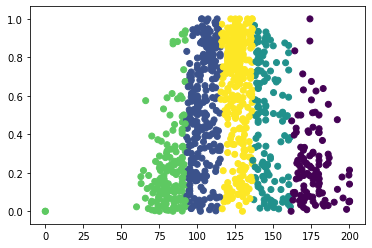

In [17]:
plt.scatter(x=track_df['tempo'], y=track_df['tempo_confidence'], c=pred)

In [18]:
tempo_KC.cluster_centers_  # boundary of cluster

array([[176.26142202,   0.25295413],
       [103.66625979,   0.53592171],
       [146.28789706,   0.48145588],
       [ 81.01582353,   0.22691765],
       [126.41945574,   0.63684918]])

# Audio Feature

In [ ]:
%matplotlib inline
from glob import glob
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
with open('./data/audio_feature/audio_feature.json') as f:
    audio_feature = json.load(f)
print(audio_feature[0])

{'_id': {'$oid': '5f61d7088aae317ea633f3d7'}, 'id': '2V4Fx72svQRxrFvNT1eq5f', 'instrumentalness': 0, 'key': 10, 'liveness': 0.254, 'loudness': -4.368, 'mode': 0, 'speechiness': 0.0438, 'tempo': 149.981, 'time_signature': 4, 'valence': 0.717, 'energy': 0.857, 'danceability': 0.676, 'acousticness': 0.0215}


In [4]:
# <json files into pandas DataFrame>

audio_feature_df = pd.DataFrame(columns=[
    "instrumentalness",
    "key",
    "liveness",
    "loudness",
    "mode",
    "speechiness",
    "tempo",
    "time_signature",
    "valence",
    "energy",
    "danceability",
    "acousticness"
])

for i in range(1000):
    # <seperate song information>
    data_info = pd.DataFrame({
        "instrumentalness": audio_feature[i]['instrumentalness'],
        "key": audio_feature[i]['key'],
        "liveness": audio_feature[i]['liveness'],
        "loudness": audio_feature[i]['loudness'],
        "mode": audio_feature[i]['mode'],
        "speechiness": audio_feature[i]['speechiness'],
        "tempo": audio_feature[i]['tempo'],
        "time_signature": audio_feature[i]['time_signature'],
        "valence": audio_feature[i]['valence'],
        "energy": audio_feature[i]['energy'],
        "danceability": audio_feature[i]['danceability'],
        "acousticness": audio_feature[i]['acousticness'],
    }, index=[i])

    audio_feature_df = audio_feature_df.append(data_info, sort=True)

In [5]:
audio_feature_df.head(5)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0215,0.676,0.857,0,10,0.254,-4.368,0,0.0438,149.981,4,0.717
1,0.0603,0.779,0.899,1.98e-06,1,0.110,-1.433,0,0.0772,123.065,4,0.654
2,0.0361,0.785,0.776,8.9e-06,4,0.262,-3.511,0,0.0431,109.979,4,0.419
3,0.0250,0.759,0.914,4.45e-06,4,0.076,-1.072,1,0.0592,123.047,4,0.674
4,0.1380,0.772,0.794,5.91e-06,11,0.058,-2.908,0,0.0730,145.102,4,0.759


In [6]:
audio_feature_df.corr()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
acousticness,1.000000,-0.219177,-0.664660,-0.116772,-0.442971,-0.111286,-0.114088,-0.224571
danceability,-0.219177,1.000000,0.072458,-0.111679,0.083553,-0.071756,-0.043859,0.321945
energy,-0.664660,0.072458,1.000000,0.236261,0.736768,0.259659,0.135005,0.465985
liveness,-0.116772,-0.111679,0.236261,1.000000,0.161187,0.048534,-0.038828,0.030314
loudness,-0.442971,0.083553,0.736768,0.161187,1.000000,0.109465,0.051394,0.334476
speechiness,-0.111286,-0.071756,0.259659,0.048534,0.109465,1.000000,0.113163,0.204362
tempo,-0.114088,-0.043859,0.135005,-0.038828,0.051394,0.113163,1.000000,0.063316
valence,-0.224571,0.321945,0.465985,0.030314,0.334476,0.204362,0.063316,1.000000


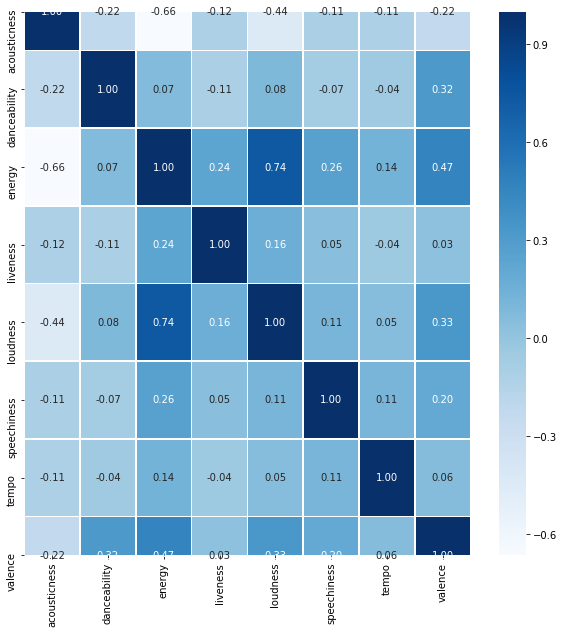

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data = audio_feature_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [35]:
# <K-means Clustering>
dance_acoustic_KC = KMeans(n_clusters=5, random_state=0, algorithm='auto', n_init=1, max_iter=20)
dance_acoustic_KC.fit(audio_feature_df.loc[: ,['instrumentalness', 'speechiness', 'danceability', 'acousticness', 'energy']])
pred = dance_acoustic_KC.predict(audio_feature_df.loc[: ,['instrumentalness', 'speechiness', 'danceability', 'acousticness', 'energy']])
audio_feature_df['cluster'] = pred

(array([15721.,  5771.,  4248.,  3559.,  3215.,  3040.,  2791.,  2817.,
         3001.,  2857.]),
 array([0.    , 0.0996, 0.1992, 0.2988, 0.3984, 0.498 , 0.5976, 0.6972,
        0.7968, 0.8964, 0.996 ]),
 <a list of 10 Patch objects>)

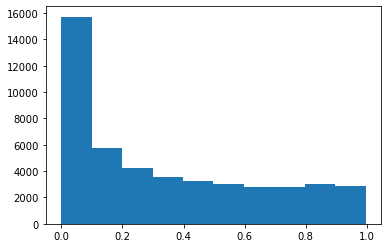

In [36]:
plt.hist(audio_feature_df['acousticness'])

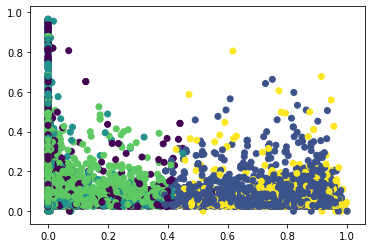

In [39]:
#     "instrumentalness",
#     "key",
#     "liveness",
#     "loudness",
#     "mode",
#     "speechiness",
#     "tempo",
#     "time_signature",
#     "valence",
#     "energy",
#     "danceability",
#     "acousticness"
plt.scatter(x=audio_feature_df['instrumentalness'], y=audio_feature_df['speechiness'], c=pred)

# Implement Reference

In [1]:
%matplotlib inline
from glob import glob
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.cluster import KMeans

In [2]:
with open('./data/audio_feature/audio_feature.json') as f:
    audio_feature = json.load(f)
print(audio_feature[0])

{'_id': {'$oid': '5f61d7088aae317ea633f3d7'}, 'id': '2V4Fx72svQRxrFvNT1eq5f', 'instrumentalness': 0, 'key': 10, 'liveness': 0.254, 'loudness': -4.368, 'mode': 0, 'speechiness': 0.0438, 'tempo': 149.981, 'time_signature': 4, 'valence': 0.717, 'energy': 0.857, 'danceability': 0.676, 'acousticness': 0.0215}


In [16]:
# <json files into pandas DataFrame>

audio_feature_df = pd.DataFrame(columns=[
    "instrumentalness",
    "key",
    "liveness",
    "loudness",
    "mode",
    "speechiness",
    "tempo",
    "time_signature",
    "valence",
    "energy",
    "danceability",
    "acousticness"
])

for i in range(len(audio_feature)):
    # <seperate song information>
    data_info = pd.DataFrame({
        "instrumentalness": audio_feature[i]['instrumentalness'],
        "key": audio_feature[i]['key'],
        "liveness": audio_feature[i]['liveness'],
        "loudness": audio_feature[i]['loudness'],
        "mode": audio_feature[i]['mode'],
        "speechiness": audio_feature[i]['speechiness'],
        "tempo": audio_feature[i]['tempo'],
        "time_signature": audio_feature[i]['time_signature'],
        "valence": audio_feature[i]['valence'],
        "energy": audio_feature[i]['energy'],
        "danceability": audio_feature[i]['danceability'],
        "acousticness": audio_feature[i]['acousticness'],
    }, index=[i])

    audio_feature_df = audio_feature_df.append(data_info, sort=True)

In [17]:
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']
df_cluster = audio_feature_df[cluster_features]
X = np.array(df_cluster)
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(df_cluster)

       acousticness  danceability instrumentalness  energy  speechiness
0            0.0215         0.676                0   0.857       0.0438
1            0.0603         0.779         1.98e-06   0.899       0.0772
2            0.0361         0.785          8.9e-06   0.776       0.0431
3            0.0250         0.759         4.45e-06   0.914       0.0592
4            0.1380         0.772         5.91e-06   0.794       0.0730
...             ...           ...              ...     ...          ...
47015        0.0690         0.688                0   0.754       0.3570
47016        0.1830         0.788                0   0.945       0.2030
47017        0.1720         0.620                0   0.748       0.2070
47018        0.1280         0.529                0   0.816       0.4940
47019        0.0165         0.801            0.848   0.663       0.0465

[47020 rows x 5 columns]


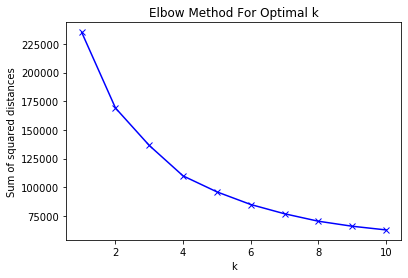

In [18]:
ss_dist = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=123)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
# <K-means Clustering>
dance_acoustic_KC = KMeans(n_clusters=5, random_state=0, algorithm='auto', n_init=1, max_iter=20)
dance_acoustic_KC.fit(df_cluster)
pred = dance_acoustic_KC.predict(df_cluster)
audio_feature_df['cluster'] = pred

In [29]:
audio_feature_df[audio_feature_df['cluster']==3].head(10)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
0,0.0215,0.676,0.857,0,10,0.2540,-4.368,0,0.0438,149.981,4,0.7170,3
1,0.0603,0.779,0.899,1.98e-06,1,0.1100,-1.433,0,0.0772,123.065,4,0.6540,3
2,0.0361,0.785,0.776,8.9e-06,4,0.2620,-3.511,0,0.0431,109.979,4,0.4190,3
3,0.0250,0.759,0.914,4.45e-06,4,0.0760,-1.072,1,0.0592,123.047,4,0.6740,3
4,0.1380,0.772,0.794,5.91e-06,11,0.0580,-2.908,0,0.0730,145.102,4,0.7590,3
5,0.0150,0.801,0.838,3.44e-06,9,0.3000,-3.251,0,0.2310,98.015,4,0.6010,3
6,0.0361,0.794,0.756,0.000351,4,0.2530,-3.528,0,0.0402,109.971,4,0.5180,3
7,0.9500,0.419,0.221,0.259,5,0.1030,-10.478,1,0.0330,127.952,4,0.0808,2
8,0.3920,0.585,0.575,0,1,0.0940,-3.936,0,0.0329,115.949,4,0.1340,0
9,0.7520,0.460,0.632,1.32e-05,9,0.0911,-6.165,0,0.0605,149.555,4,0.3330,2


In [30]:
audio_feature_df.head(10)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster
0,0.0215,0.676,0.857,0,10,0.2540,-4.368,0,0.0438,149.981,4,0.7170,3
1,0.0603,0.779,0.899,1.98e-06,1,0.1100,-1.433,0,0.0772,123.065,4,0.6540,3
2,0.0361,0.785,0.776,8.9e-06,4,0.2620,-3.511,0,0.0431,109.979,4,0.4190,3
3,0.0250,0.759,0.914,4.45e-06,4,0.0760,-1.072,1,0.0592,123.047,4,0.6740,3
4,0.1380,0.772,0.794,5.91e-06,11,0.0580,-2.908,0,0.0730,145.102,4,0.7590,3
5,0.0150,0.801,0.838,3.44e-06,9,0.3000,-3.251,0,0.2310,98.015,4,0.6010,3
6,0.0361,0.794,0.756,0.000351,4,0.2530,-3.528,0,0.0402,109.971,4,0.5180,3
7,0.9500,0.419,0.221,0.259,5,0.1030,-10.478,1,0.0330,127.952,4,0.0808,2
8,0.3920,0.585,0.575,0,1,0.0940,-3.936,0,0.0329,115.949,4,0.1340,0
9,0.7520,0.460,0.632,1.32e-05,9,0.0911,-6.165,0,0.0605,149.555,4,0.3330,2


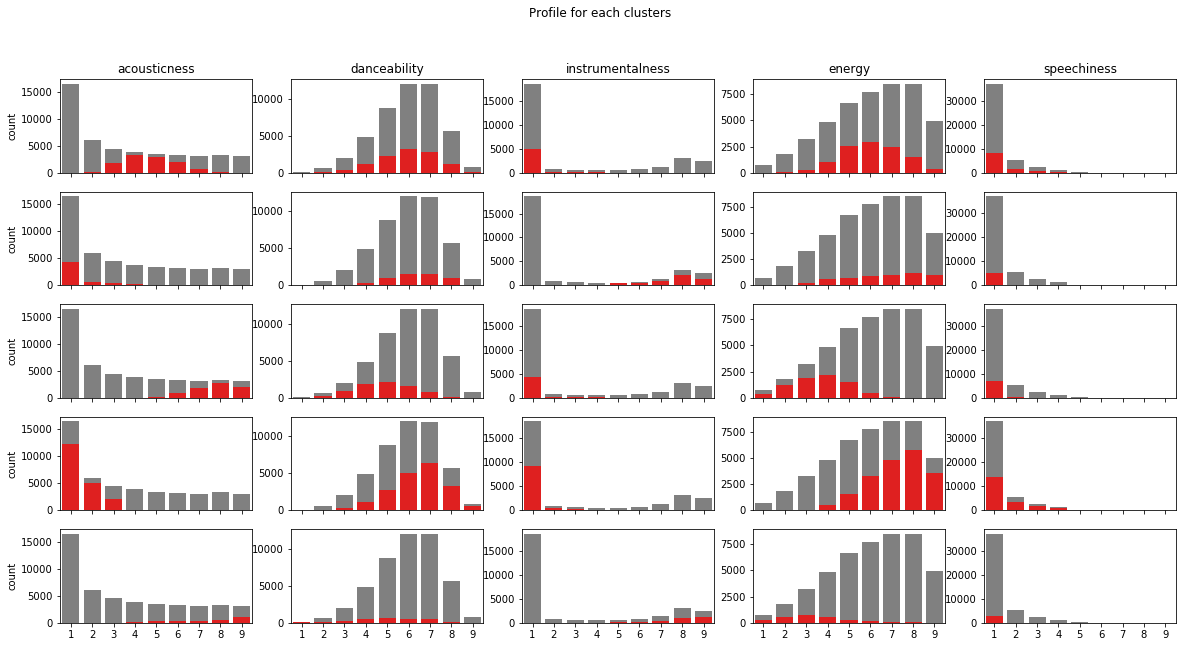

In [21]:
# set binning intervals of 0.1
bins = np.linspace(0,1,10)
# create subplots for number of clusters(Rows) and features(Cols)
num_features = len(cluster_features)
f, axes = plt.subplots(5, num_features, 
                       figsize=(20, 10), sharex='col')
row = 0
for cluster in np.sort(audio_feature_df['cluster'].unique()):
    df_cluster = audio_feature_df[audio_feature_df['cluster'] == cluster]
    col = 0
    for feature in cluster_features:
        rec_grp = audio_feature_df.groupby(pd.cut(audio_feature_df[feature], bins)).size().reset_index(name='count')
        cluster_grp = df_cluster.groupby(pd.cut(df_cluster[feature], bins)).size().reset_index(name='count')

        sns.barplot(data=rec_grp, x=feature, y='count', 
                    color='grey', ax=axes[row, col])
        sns.barplot(data=cluster_grp, x=feature, y='count', 
                    color='red', ax=axes[row, col])
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels(range(1,10))
        if col > 0:
            axes[row, col].set_ylabel('')
        if row == 0:
            axes[row, col].set_title(feature)
        col += 1

    row += 1
    
f.suptitle('Profile for each clusters')
    
plt.show()